In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
topzip = pd.read_csv('topzip.csv')
topzip.head()

,time,Zipcode,value
0,1996-04-01,7030,301600.0
1,1996-04-01,11211,133200.0
2,1996-04-01,7302,137200.0
3,1996-04-01,11216,146100.0
4,1996-04-01,11222,149200.0


In [3]:
topzip['time'] = pd.to_datetime(topzip['time'])
topzip.set_index('time', inplace=True)

In [4]:
NY = topzip[topzip['Zipcode'].isin(['11211', '11222', '11216'])]

# Zipcode : 11211

In [5]:
first = NY[NY['Zipcode'] == 11211]
first.drop(['Zipcode'], axis=1, inplace=True)

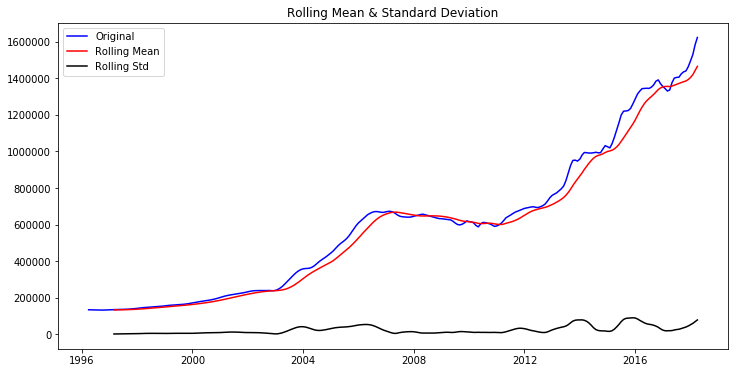

In [6]:
roll_mean = first.rolling(window=12, center=False).mean()
roll_std = first.rolling(window=12, center=False).std()


fig = plt.figure(figsize=(12,6))
plt.plot(first, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.9986576909330424
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   1.988403
p-value                          0.998658
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


## Differencing

In [8]:
diff_first = first.diff().dropna()


In [9]:
dftest = adfuller(diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.14715576436846545
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -2.381053
p-value                          0.147156
#Lags Used                      14.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [10]:
second_diff_first = diff_first.diff().dropna()


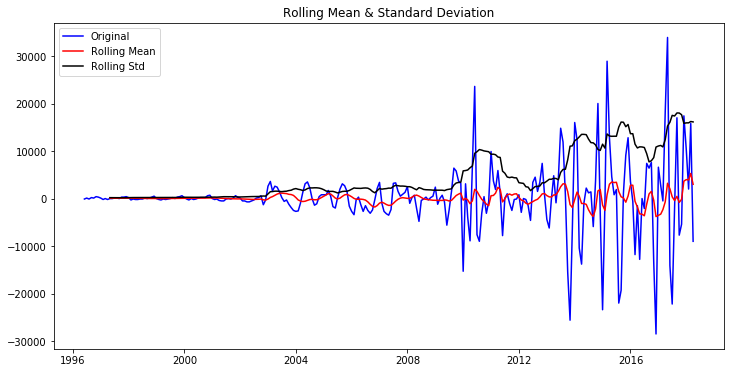

In [11]:
roll_mean = second_diff_first.rolling(window=12, center=False).mean()
roll_std = second_diff_first.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second_diff_first, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [12]:
dftest = adfuller(second_diff_first['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 1.1773741124898173e-07
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                -6.066657e+00
p-value                        1.177374e-07
#Lags Used                     1.300000e+01
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


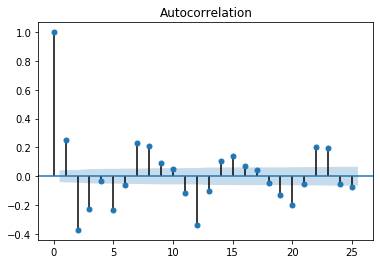

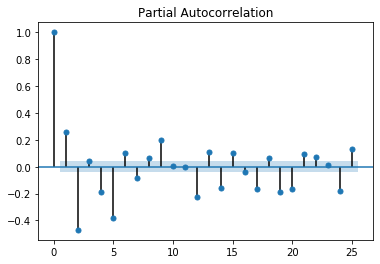

In [13]:
plot_acf(second_diff_first[:-1], alpha=0.5);
plot_pacf(second_diff_first[:-1], alpha=0.5);

#  Zipcode : 11222

In [14]:
second = NY[NY['Zipcode'] == 11222]
second.drop(['Zipcode'], axis=1, inplace=True)

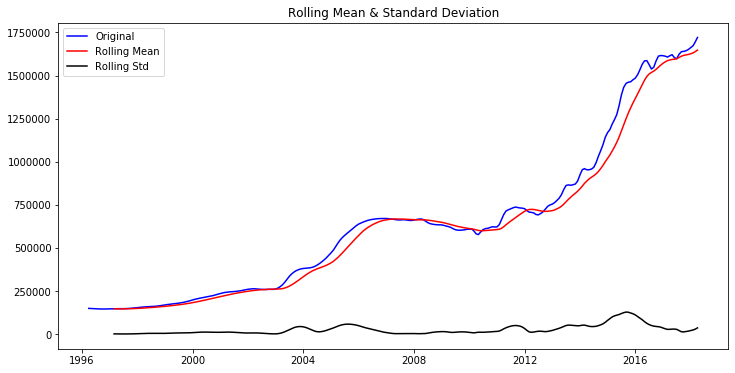

In [15]:
roll_mean = second.rolling(window=12, center=False).mean()
roll_std = second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.9945168916750932
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   1.024405
p-value                          0.994517
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


## Differencing 

In [17]:
diff_second = second.diff().dropna()


In [18]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.2753256570685183
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -2.025918
p-value                          0.275326
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [19]:
second_diff_second = diff_second.diff().dropna()


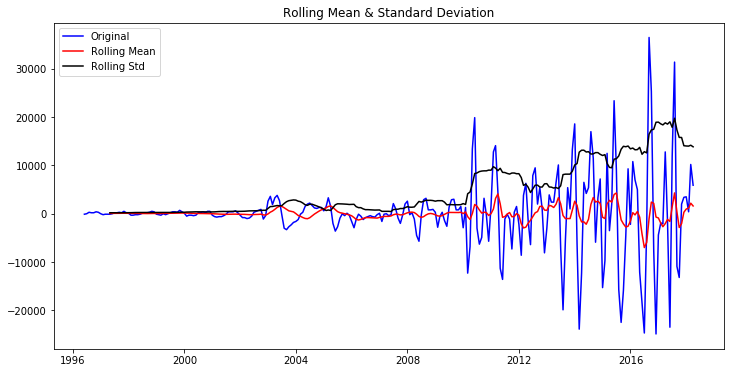

In [20]:
roll_mean = second_diff_second.rolling(window=12, center=False).mean()
roll_std = second_diff_second.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second_diff_second, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_diff_second['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 2.5818511123122645e-08
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                -6.353100e+00
p-value                        2.581851e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.470000e+02
Critical Value (1%)           -3.457105e+00
Critical Value (5%)           -2.873314e+00
Critical Value (10%)          -2.573044e+00
dtype: float64


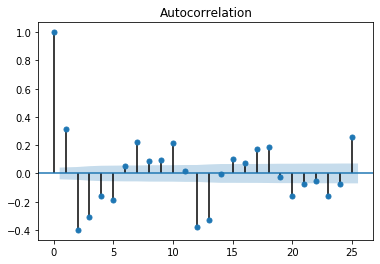

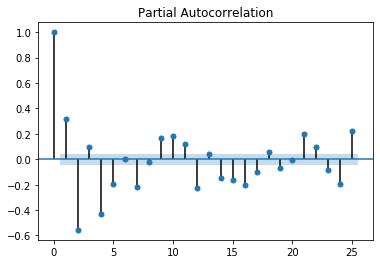

In [22]:
plot_acf(second_diff_second[:-1], alpha=0.5);
plot_pacf(second_diff_second[:-1], alpha=0.5);

# Zipcode : 11216


In [23]:
third = NY[NY['Zipcode'] == 11216]
third.drop(['Zipcode'], axis=1, inplace=True)

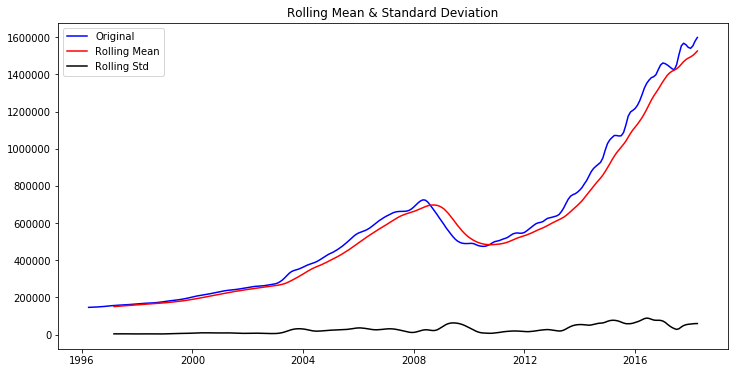

In [24]:
roll_mean = third.rolling(window=12, center=False).mean()
roll_std = third.rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(third, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.9724380332622606
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                   0.203156
p-value                          0.972438
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


## Differencing 

In [26]:
diff_third = third.diff().dropna()


In [27]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 0.3685996101349409
Fail to reject the null hypothesis. Data is not stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -1.824028
p-value                          0.368600
#Lags Used                      16.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [28]:
second_diff_third = diff_third.diff().dropna()


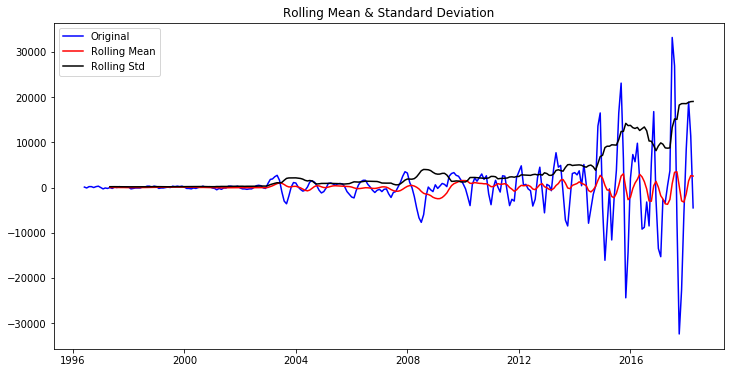

In [29]:
roll_mean = second_diff_third .rolling(window=12, center=False).mean()
roll_std = second_diff_third .rolling(window=12, center=False).std()

fig = plt.figure(figsize=(12,6))
plt.plot(second_diff_third , color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(second_diff_third['value'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('p-value:',dfoutput[1])

if dfoutput[1] > .05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
else:
        print('Reject the null hypothesis. Data is stationary.\n')
        
        
        
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

p-value: 4.496299484176765e-06
Reject the null hypothesis. Data is stationary.

Results of Dickey-Fuller test: 

Test Statistic                  -5.341195
p-value                          0.000004
#Lags Used                      15.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


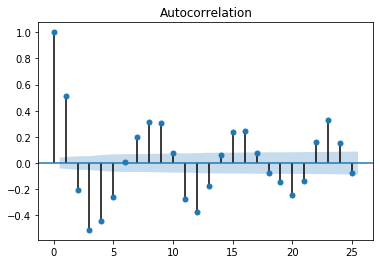

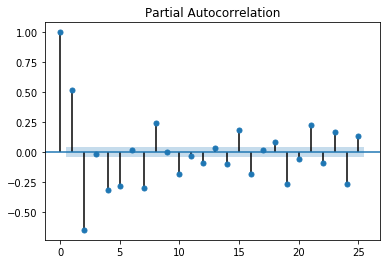

In [31]:
plot_acf(second_diff_third[:-1], alpha=0.5);
plot_pacf(second_diff_third[:-1], alpha=0.5);

# Modeling 

In [33]:
from numpy import linalg as LA
import numpy as np
LinAlgError = np.linalg.LinAlgError

global summary_df
summary_df = pd.DataFrame(columns = ['Zip', 'Order', 'AIC', 'BIC', 'test_mse', 'test_rmse'])


In [51]:
orders = [(1, 0, 0), (1, 1, 0), (2, 1, 3), (3, 1, 1), (2, 2, 2), (4, 1, 1), (3, 2, 3), (3, 2, 1), (3, 2, 2), (1, 0, 1),
         (1, 1, 1), (2, 1, 1)] 
def train_test(df):
    train = df[:'2015-04']
    test = df['2015-05':]
    return train, test


def model_build(zipcode, df, orders):
    train, test = train_test(df)
    for i in orders:
#         print(i)
        try:
            zip_ = zipcode
            order = i
            model = ARIMA(train, order=i)
            fitted = model.fit(disp=-1)
            test_fc, se, conf = fitted.forecast(36, alpha=0.05)
            aic = round(fitted.aic, 2)
            bic = round(fitted.bic, 2)
            test_mse = round(mean_squared_error(test.values, test_fc), 2)
            test_rmse = round(np.sqrt(test_mse), 2)
            global summary_df
            summary_df = summary_df.append({'Zip': zip_, 'Order': str(order), 
                                                      'AIC': aic, 'BIC': bic,
                                                      'test_mse': test_mse, 
                                                      'test_rmse': test_rmse},
                                                     ignore_index=True)
        except (LinAlgError, ValueError):
            continue
        
    return summary_df

In [35]:
model_build('11211', first, orders)
model_build('11222', second, orders)
model_build('11216', third, orders)

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,11211,"(1, 0, 0)",4837.85,4848.15,8.869835e+10,297822.68
1,11211,"(1, 1, 0)",4530.75,4541.04,9.240997e+09,96130.10
2,11211,"(2, 1, 3)",5398.76,5422.76,1.875621e+09,43308.44
3,11211,"(3, 1, 1)",4421.50,4442.08,2.290730e+10,151351.56
4,11211,"(2, 2, 2)",4413.07,4433.62,7.070915e+09,84088.73
5,11211,"(4, 1, 1)",4423.36,4447.37,2.387964e+10,154530.40
6,11211,"(3, 2, 1)",4417.48,4438.03,1.979311e+10,140687.97
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67
8,11211,"(1, 1, 1)",4449.18,4462.89,2.240749e+10,149691.31
9,11211,"(2, 1, 1)",4444.99,4462.14,3.024783e+10,173919.03


In [36]:
first_zipcode = summary_df[summary_df['Zip'] == '11211']
second_zipcode = summary_df[summary_df['Zip'] == '11222'] 
third_zipcode = summary_df[summary_df['Zip'] == '11216']

In [46]:
def best_model(df, order=(0,0,0)):
    train, test = train_test(df)

    no1_model = ARIMA(train, order=order)
    best_fit = no1_model.fit()
    test_fc, se, conf = best_fit.forecast(36, alpha=0.05)

    fc_series = pd.Series(test_fc, index=test.index)

    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)
    print(best_fit.summary())
    print('\n')
    print('\n')
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

## Model for Zipcode : 11211

In [37]:
first_zipcode

,Zip,Order,AIC,BIC,test_mse,test_rmse
0,11211,"(1, 0, 0)",4837.85,4848.15,8.869835e+10,297822.68
1,11211,"(1, 1, 0)",4530.75,4541.04,9.240997e+09,96130.10
2,11211,"(2, 1, 3)",5398.76,5422.76,1.875621e+09,43308.44
3,11211,"(3, 1, 1)",4421.50,4442.08,2.290730e+10,151351.56
4,11211,"(2, 2, 2)",4413.07,4433.62,7.070915e+09,84088.73
5,11211,"(4, 1, 1)",4423.36,4447.37,2.387964e+10,154530.40
6,11211,"(3, 2, 1)",4417.48,4438.03,1.979311e+10,140687.97
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67
8,11211,"(1, 1, 1)",4449.18,4462.89,2.240749e+10,149691.31
9,11211,"(2, 1, 1)",4444.99,4462.14,3.024783e+10,173919.03


In [39]:
first_zipcode.sort_values('AIC', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67
4,11211,"(2, 2, 2)",4413.07,4433.62,7.070915e+09,84088.73
6,11211,"(3, 2, 1)",4417.48,4438.03,1.979311e+10,140687.97


In [41]:
first_zipcode.sort_values('test_rmse', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
2,11211,"(2, 1, 3)",5398.76,5422.76,1.875621e+09,43308.44
4,11211,"(2, 2, 2)",4413.07,4433.62,7.070915e+09,84088.73
7,11211,"(3, 2, 2)",4404.26,4428.23,7.651818e+09,87474.67


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -2195.130
Method:                       css-mle   S.D. of innovations           3796.116
Date:                Wed, 06 May 2020   AIC                           4404.260
Time:                        16:17:54   BIC                           4428.235
Sample:                    06-01-1996   HQIC                          4413.934
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             35.4742     20.632      1.719      0.086      -4.963      75.912
ar.L1.D2.value     1.1433      0.102     11.241      0.000       0.944       1.343
ar.L2.D2.value    -0.8140      0.130

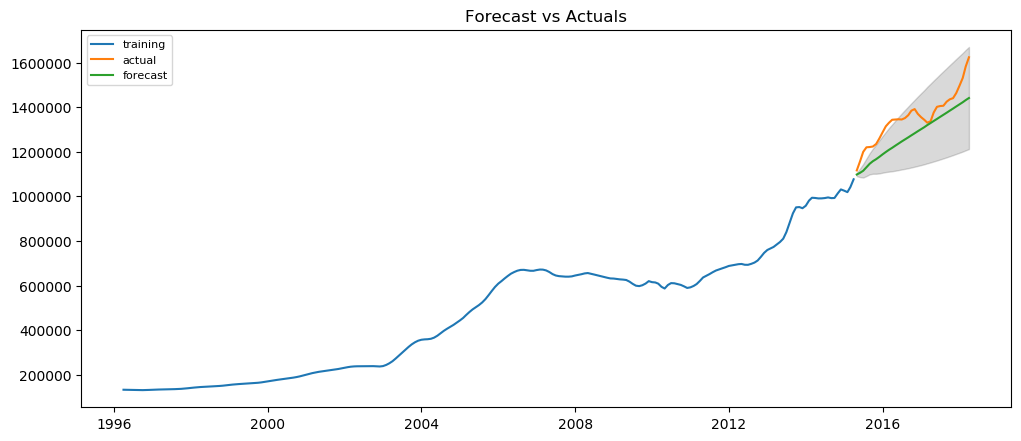

In [56]:
best_model(first, order=(3, 2, 2))

## Model for Zipcode : 11222

In [57]:
second_zipcode

,Zip,Order,AIC,BIC,test_mse,test_rmse
10,11222,"(1, 0, 0)",4910.49,4920.79,1.105571e+11,332501.21
11,11222,"(1, 1, 0)",4515.08,4525.36,1.199286e+10,109511.91
12,11222,"(2, 1, 3)",4341.16,4365.17,1.662817e+10,128950.25
13,11222,"(3, 1, 1)",4401.41,4421.99,3.548783e+10,188382.15
14,11222,"(2, 2, 2)",4347.81,4368.36,1.029933e+10,101485.63
15,11222,"(4, 1, 1)",4395.62,4419.62,5.055173e+10,224837.11
16,11222,"(3, 2, 3)",4324.31,4351.71,1.642577e+10,128163.06
17,11222,"(3, 2, 1)",4396.13,4416.68,1.167831e+10,108066.21
18,11222,"(3, 2, 2)",4341.58,4365.56,9.435570e+09,97136.86
19,11222,"(2, 1, 1)",4415.29,4432.43,4.602364e+10,214531.22


In [59]:
second_zipcode.sort_values('AIC', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
16,11222,"(3, 2, 3)",4324.31,4351.71,1.642577e+10,128163.06
12,11222,"(2, 1, 3)",4341.16,4365.17,1.662817e+10,128950.25
18,11222,"(3, 2, 2)",4341.58,4365.56,9.435570e+09,97136.86


In [60]:
second_zipcode.sort_values('test_rmse', axis=0, ascending=True)[:3]

,Zip,Order,AIC,BIC,test_mse,test_rmse
18,11222,"(3, 2, 2)",4341.58,4365.56,9.435570e+09,97136.86
14,11222,"(2, 2, 2)",4347.81,4368.36,1.029933e+10,101485.63
17,11222,"(3, 2, 1)",4396.13,4416.68,1.167831e+10,108066.21


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -2163.790
Method:                       css-mle   S.D. of innovations           3267.934
Date:                Wed, 06 May 2020   AIC                           4341.581
Time:                        16:20:43   BIC                           4365.555
Sample:                    06-01-1996   HQIC                          4351.255
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             74.2870    326.876      0.227      0.820    -566.378     714.952
ar.L1.D2.value    -0.7462      0.066    -11.248      0.000      -0.876      -0.616
ar.L2.D2.value    -0.4901      0.077

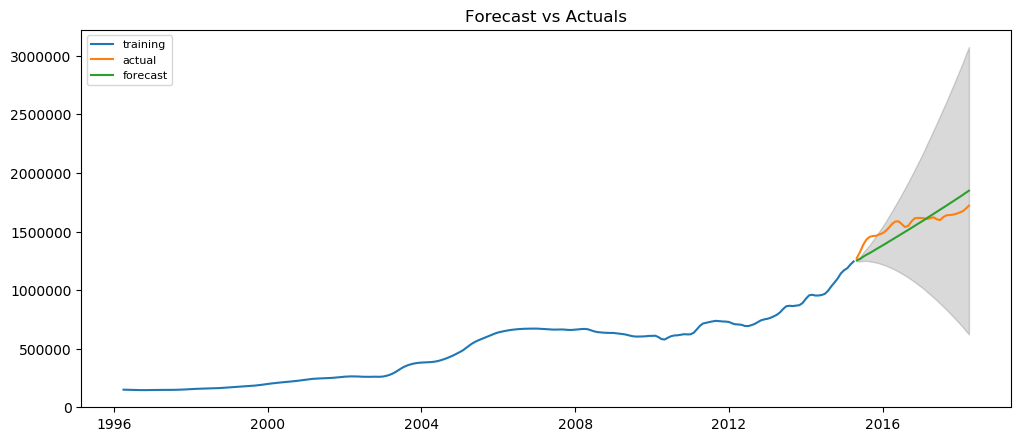

In [63]:
best_model(second, order=(3, 2, 2))

## Model for Zipcode : 	11216

In [64]:
third_zipcode

,Zip,Order,AIC,BIC,test_mse,test_rmse
20,11216,"(1, 0, 0)",4839.89,4850.19,1.134816e+11,336870.25
21,11216,"(1, 1, 0)",4270.14,4280.42,3.267162e+10,180752.92
22,11216,"(3, 1, 1)",4092.80,4113.37,3.293841e+10,181489.43
23,11216,"(2, 2, 2)",4072.15,4092.70,1.298018e+10,113930.59
24,11216,"(4, 1, 1)",4094.79,4118.80,3.249205e+10,180255.53
25,11216,"(3, 2, 3)",4036.65,4064.05,3.346283e+09,57847.06
26,11216,"(3, 2, 1)",4082.23,4102.78,2.215083e+09,47064.67
27,11216,"(3, 2, 2)",4073.36,4097.34,9.596497e+09,97961.71
28,11216,"(2, 1, 1)",4104.75,4121.90,4.655286e+10,215761.12


In [65]:
third_zipcode.sort_values('AIC', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
25,11216,"(3, 2, 3)",4036.65,4064.05,3.346283e+09,57847.06
23,11216,"(2, 2, 2)",4072.15,4092.70,1.298018e+10,113930.59
27,11216,"(3, 2, 2)",4073.36,4097.34,9.596497e+09,97961.71


In [67]:
third_zipcode.sort_values('test_rmse', axis=0, ascending=True)[:3]


,Zip,Order,AIC,BIC,test_mse,test_rmse
26,11216,"(3, 2, 1)",4082.23,4102.78,2.215083e+09,47064.67
25,11216,"(3, 2, 3)",4036.65,4064.05,3.346283e+09,57847.06
27,11216,"(3, 2, 2)",4073.36,4097.34,9.596497e+09,97961.71


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  227
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -2010.326
Method:                       css-mle   S.D. of innovations           1683.200
Date:                Wed, 06 May 2020   AIC                           4036.652
Time:                        16:23:18   BIC                           4064.052
Sample:                    06-01-1996   HQIC                          4047.708
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             72.6114    101.658      0.714      0.475    -126.634     271.857
ar.L1.D2.value     0.3226      0.100      3.242      0.001       0.128       0.518
ar.L2.D2.value     0.2534      0.092

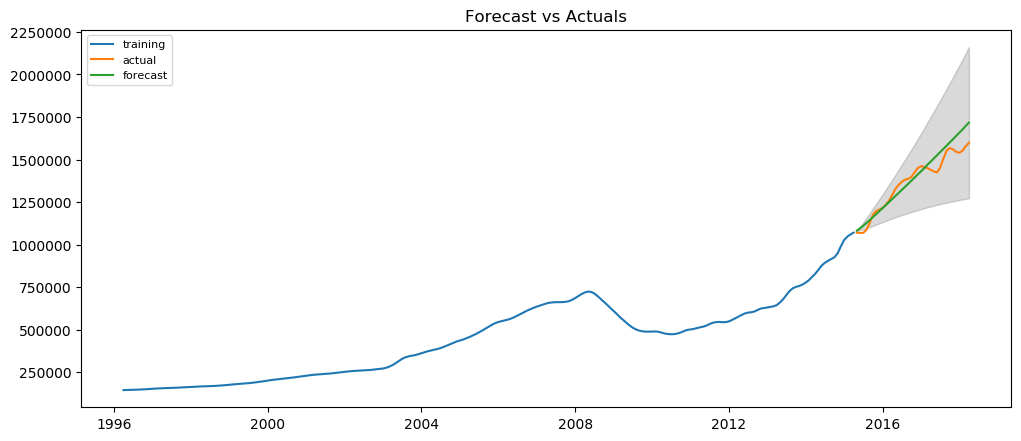

In [71]:
best_model(third,order=(3,2,3))